In [1]:
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
isw_data = pd.read_csv("..\clean_data\isw.csv")

In [5]:
tg_messages = pd.read_csv("..\clean_data\preprocessed_tg.csv")

In [6]:
tg_messages.head()

,time,date,message
0,23:40:45,2023-01-25,ще декілька бпла на лінії фронту у запорізькій...
1,23:23:13,2023-01-25,збиваються цілі на півдні про кожну не пишемо
2,23:09:57,2023-01-25,дніпро робота ппо
3,22:58:42,2023-01-25,загрози ту22м3 на даний момент немає тільки бпла
4,22:41:15,2023-01-25,є збиття бпла по півдню


In [7]:
isw_data.head()

,date,title,url,html,main_text
0,24-02-2022,Russia-Ukraine Warning Update: Initial Russian...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\r\n\r\n<html dir=""ltr"" lang=""e...","february 24, 3:00 pm est russian president vla..."
1,25-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\r\n\r\n<html dir=""ltr"" lang=""e...",russian forces carried out additional air and ...
2,26-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\r\n\r\n<html dir=""ltr"" lang=""e...",russia has surprisingly failed to gain air sup...
3,27-02-2022,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\r\n\r\n<html dir=""ltr"" lang=""e...","february 27, 4pm est the russian military has ..."
4,28-02-2022,"Russian Offensive Campaign Assessment, Februar...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\r\n\r\n<html dir=""ltr"" lang=""e...","february 28, 3:30pm est the russian military i..."


In [8]:
# test text vectorization 
isw_text_data = isw_data[["date", "main_text"]]

In [9]:
isw_text_data.head()

,date,main_text
0,24-02-2022,"february 24, 3:00 pm est russian president vla..."
1,25-02-2022,russian forces carried out additional air and ...
2,26-02-2022,russia has surprisingly failed to gain air sup...
3,27-02-2022,"february 27, 4pm est the russian military has ..."
4,28-02-2022,"february 28, 3:30pm est the russian military i..."


In [10]:
isw_text_data["main_text"][isw_text_data["main_text"].isnull()]

273    NaN
304    NaN
311    NaN
Name: main_text, dtype: object

In [11]:
isw_text_data["main_text"] = isw_text_data["main_text"].fillna('')

c:\users\zorian\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Remove:
1) Stop words.
2) Digits.
3) Non-word and non-whitespace characters.

In [12]:
def to_vector_preprocessing(text, stop_words = ''):
    if not stop_words:
        stop_words = [stopwords.words(lang) for lang in ["english", "russian"]]
    lemmatizer = WordNetLemmatizer()
    text_array = word_tokenize(re.sub('[\W\s\d]', ' ', text.lower()))
    processed_text = ' '.join( 
            [
            word for word in text_array
            if (len(word) > 2 and word not in stop_words) 
            ])
    return processed_text

In [13]:
def tfidf_vectorizer(_corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(_corpus)
    sparse_matrix = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
    return sparse_matrix

In [14]:
processed_text = isw_text_data["main_text"].apply(lambda row: to_vector_preprocessing(row))

In [15]:
sm = tfidf_vectorizer(processed_text.tolist())

In [16]:
sm.head()

,abachev,abandon,abandoned,abandoning,abandonment,abbreviated,abc,abdollahian,abduct,abducted,...,дивизион,кедр,коридор,набор,окремі,переселения,программа,підрозділи,рбк,сухопутный
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.047824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


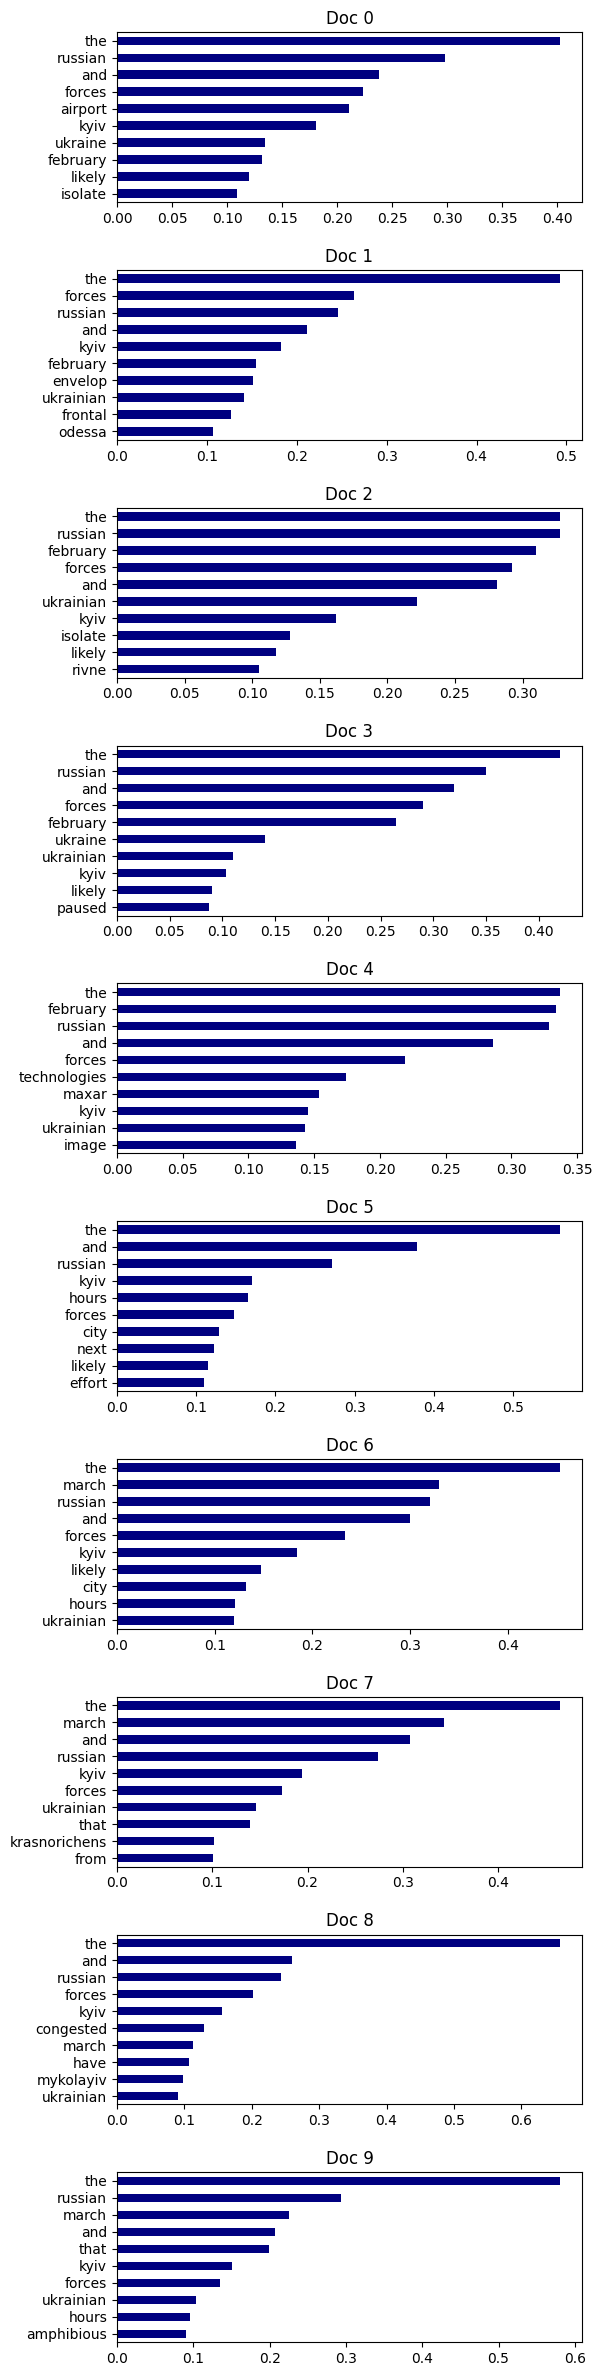

In [17]:
fig, ax = plt.subplots(10, figsize=(6, 30))
for i in range(10):
    sm.iloc[i, :].sort_values(ascending=False)[:10].plot.barh(
        ax=ax[i], 
        cmap="jet", 
        title=f"Doc {i}").invert_yaxis()
plt.subplots_adjust(hspace=0.4)